In [9]:
import torch
from autoencoder import ResNetAutoencoder, DecoderBlock, ResidualBlock
import matplotlib.pyplot as plt
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [20]:
raw_model = torch.load("models/autoencoder.pt", weights_only=False)

model = ResNetAutoencoder(2056 * 2)
model.load_state_dict(raw_model.state_dict())
model : ResNetAutoencoder  = model.to(DEVICE).to(torch.bfloat16)


In [18]:

test_imgs = torch.load("data/img_shard_7.pt")
imgs : torch.Tensor = test_imgs[torch.randint(0, len(test_imgs), (4,))].to(DEVICE).to(torch.bfloat16)

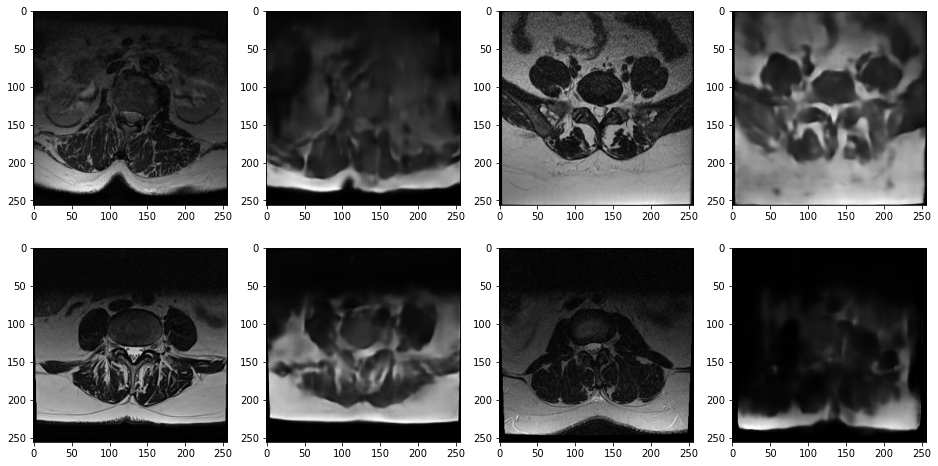

In [21]:



with torch.no_grad():
    pred : torch.Tensor = model(imgs)

plt.figure(figsize=(16, 8))
for i in range(len(imgs)):

    v_img = imgs[i].cpu().to(torch.float32).squeeze()
    v_pred = pred[i].cpu().to(torch.float32).squeeze()
    plt.subplot(2, 4, i * 2 + 1)
    plt.imshow(v_img, cmap="gray")
    plt.subplot(2, 4, i * 2 + 2)
    plt.imshow(v_pred, cmap="gray")

plt.show();

In [3]:
from torchvision.models.resnet import resnet152

model = resnet152()


print(f"Current model has {sum(p.element_size() * p.nelement() for p in model.parameters()) / (2**30):.3f}GB parameters")

Current model has 0.224GB parameters
